In [56]:
from keras.layers import Input, Dense
import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns, pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from keras.models import Sequential
import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np

from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix
from keras.optimizers import Adam
from keras.models import Model
from scipy.special import expit as sigmoid

In [57]:
df=pd.read_csv('wine.data.csv', usecols=['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

#rint(df.keys())
#print(df.head())

X = df.drop('Cultivator',axis=1)
y = df['Cultivator']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)


scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True,with_std=True)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_40 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 51        
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


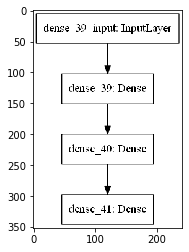

In [135]:
model= Sequential()

model.add(Dense(13, input_shape=(13,),
#activation='sigmoid'
activation='relu'
))

model.add(Dense(50, activation='relu'))
model.add(Dense(1))

#model.compile(optimizer=Adam(0.01),loss='binary_crossentropy')
model.compile(optimizer=Adam(0.01),loss='mae')

model.summary()

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [143]:
#print(X_train[0])
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#cm=confusion_matrix(y_test,predictions)
#print(cm)
  

Epoch 1/1
124/124 [==============================] - 0s 56us/step - loss: 0.0276


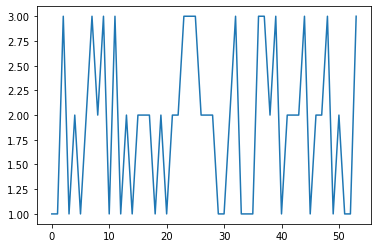

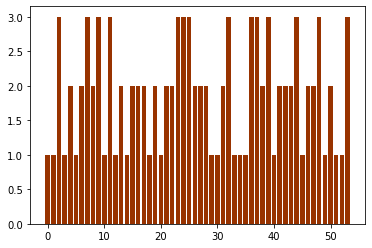

In [144]:
y_pos = np.arange(len(predictions))

prediction_result = predictions.flatten().round() 

plt.plot(predictions.round())
#plt.barh(y_pos,list_test)
plt.show()

plt.bar(y_pos,prediction_result, color='green')
plt.bar(y_pos,y_test,color='red',alpha=.6 )

plt.show()
#plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')


In [145]:
print(model.evaluate(X_test,y_test))
#produces the mean square error of the system

54/54 [==============================] - 0s 259us/step
0.08981275586066423
